In [1]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Sklearn for data import and scalers
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#interactive plot
# Please consult information to update plotly.offline 
# e.g. https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee
import plotly
from plotly.offline import plot
from plotly.graph_objs import *

/var/folders/x0/b0s4r41d0312h6mf4w2sqpfr0000gn/T/ipykernel_10555/3385420729.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('Data_CC.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)
# Since we have found multiple missing values, we decided to replace them with the mean of the column, since it is the most common method to deal with missing values and therefore should not affect the results of the analysis, being the most conservative approach.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()
#transform data into a numpy array
data_ar = data.values

# 3 - Principal Component Analysis 
## Select  a  subset  of  3  to  6  features  related  to  the  same  aspect  of  the  phenomenon  to  which  your  data  set relates to. Explain your choice.

Features chosen: purchases,balance, purchases_freq, purchases_installments_freq, one_off_purhcases_freq

In [3]:
data.drop(['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','BALANCE_FREQUENCY', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1, inplace=True)
data.shape
data

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,40.900749,95.40,0.166667,0.000000,0.083333
1,3202.467416,0.00,0.000000,0.000000,0.000000
2,2495.148862,773.17,1.000000,1.000000,0.000000
3,1666.670542,1499.00,0.083333,0.083333,0.000000
4,817.714335,16.00,0.083333,0.083333,0.000000
...,...,...,...,...,...
8945,28.493517,291.12,1.000000,0.000000,0.833333
8946,19.183215,300.00,1.000000,0.000000,0.833333
8947,23.398673,144.40,0.833333,0.000000,0.666667
8948,13.457564,0.00,0.000000,0.000000,0.000000


 ### Visualization of Data by Principal Components / SVD

In [4]:
#Normalize data by Range
means = data.mean(axis=0)
Rmax = data.max(axis=0)
Rmin = data.min(axis=0)

X_normed_range = (data - means) / (Rmax - Rmin)


In [5]:
#normalize data by Standard Deviation
stddev = data.std(axis=0)
X_normed_std = (data - means) / stddev


 #### 2.1 Calculate the Principal Components (PC's) by the conventional' method
 - Use the covariance matrix of the normalized data to obtain the principal components.
 - Notice the need to transpose the data matrix.

In [6]:
## Covariance matrix of the normalized data
cov_matrix = np.cov(X_normed_range.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
eigenvalues_range, eigenvectors_range = np.linalg.eig(cov_matrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(eigenvalues_range) * -1))
eigenvalues_range = eigenvalues_range[order]
eigenvectors_range = eigenvectors_range[:,order]

print('Eigenvectors \n%s' %eigenvectors_range)
print('\nEigenvalues \n%s' %eigenvalues_range)


Eigenvectors 
[[ 0.01214088 -0.03886417  0.90026167  0.42937273  0.05924662]
 [-0.03247578 -0.04733019  0.10448728 -0.08595755 -0.98914048]
 [-0.70712793 -0.11562867 -0.29251694  0.6307056  -0.05695951]
 [-0.24227189 -0.88446971  0.1322753  -0.363774    0.0958613 ]
 [-0.66337949  0.44787585  0.27486073 -0.52737964  0.07521422]]

Eigenvalues 
[0.31118273 0.08875829 0.01267161 0.00810216 0.00119897]


In [7]:
## Covariance matrix of the normalized data
cov_matrix = np.cov(X_normed_std.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
eigenvalues_std, eigenvectors_std = np.linalg.eig(cov_matrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(eigenvalues_std) * -1))
eigenvalues_std = eigenvalues_std[order]
eigenvectors_std = eigenvectors_std[:,order]

print('Eigenvectors \n%s' %eigenvectors_std)
print('\nEigenvalues \n%s' %eigenvalues_std)

Eigenvectors 
[[ 0.02332594  0.70054767  0.66973912  0.24376417 -0.02678445]
 [ 0.4421194   0.40793501 -0.16204184 -0.77817641 -0.07939383]
 [ 0.59724334 -0.25002084  0.11936703  0.25562985 -0.70795117]
 [ 0.42788922  0.35792658 -0.56368992  0.51491054  0.3254538 ]
 [ 0.5140015  -0.39012836  0.43954196 -0.06738704  0.62117966]]

Eigenvalues 
[2.38973676 1.20593717 0.83920379 0.51163583 0.05348646]


In [8]:
## Covariance matrix of the normalized data
cov_matrix = np.cov(data.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
eigenvalues_normal, eigenvectors_normal = np.linalg.eig(cov_matrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(eigenvalues_std) * -1))
eigenvalues_normal = eigenvalues_normal[order]
eigenvectors_normal = eigenvectors_normal[:,order]

print('Eigenvectors \n%s' %eigenvectors_normal)
print('\nEigenvalues \n%s' %eigenvalues_normal)

Eigenvectors 
[[-6.54718623e-01 -7.55872690e-01  3.78489600e-05 -4.84158040e-06
   2.12318402e-07]
 [-7.55872687e-01  6.54718616e-01 -1.08525668e-04 -1.45288954e-05
   5.59222102e-05]
 [-4.03019148e-05  7.42581262e-05  7.00730677e-01 -6.75425048e-01
  -2.29733574e-01]
 [-5.12780823e-05  4.77840282e-05  1.28013142e-01  4.35826177e-01
  -8.90880561e-01]
 [-3.19814923e-05  5.91451451e-05  7.01846949e-01  5.94858426e-01
   3.91860062e-01]]

Eigenvalues 
[5.26347788e+06 3.63450534e+06 2.54226206e-01 7.90682288e-03
 7.71074514e-02]


In [9]:
# generate PCA component space (PCA scores)
pc_range = np.dot(X_normed_range, eigenvectors_range)

# generate PCA component space (PCA scores)
pc_std = np.dot(X_normed_std, eigenvectors_std)

# generate PCA component space (PCA scores)
pc_normal = np.dot(X_normed_range, eigenvectors_normal)

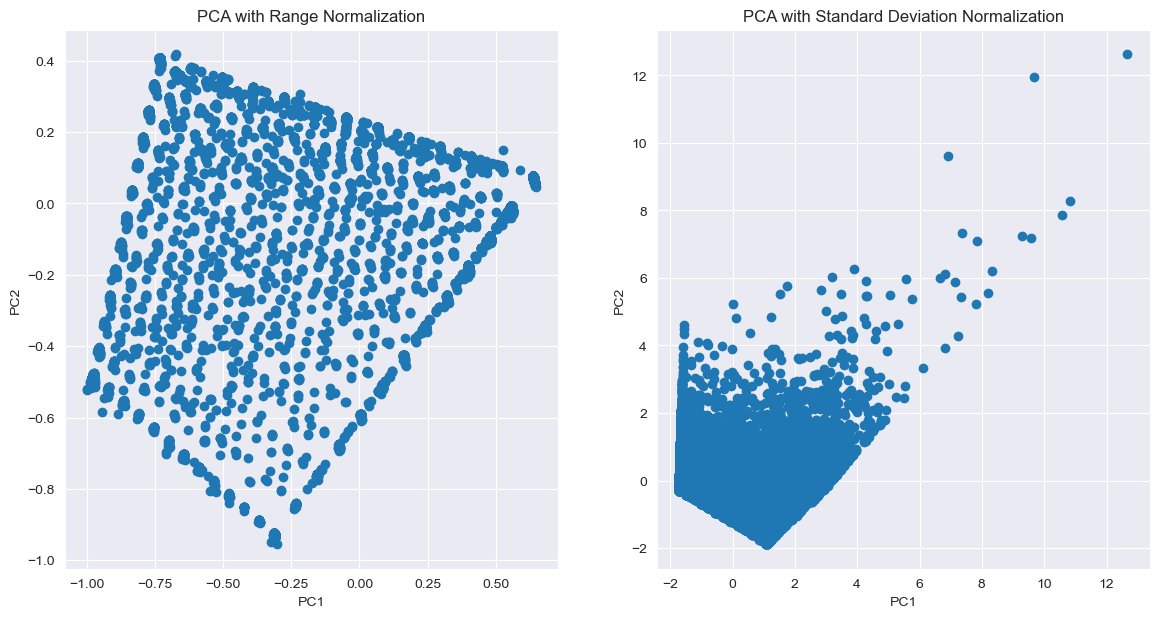

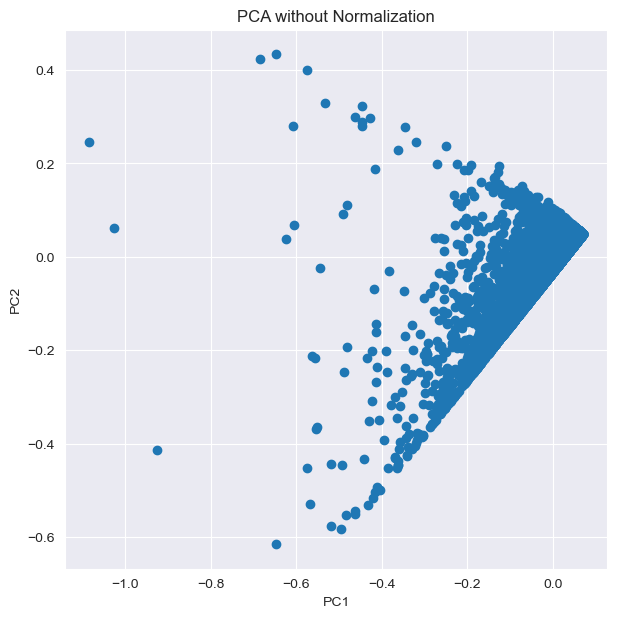

In [10]:
#plot pca with range normalization and std normaliztion side by side
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(pc_range[:, 0], pc_range[:, 1])
plt.title('PCA with Range Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(pc_std[:, 0], pc_std[:, 1])
plt.title('PCA with Standard Deviation Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')

#plot pca with no normalization
plt.figure(figsize=(7, 7))
plt.scatter(pc_normal[:, 0], pc_normal[:, 1])
plt.title('PCA without Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.show()


#### 2.2 Project PCA's on a 3D plot

Text(0.5, 0, 'PC3')

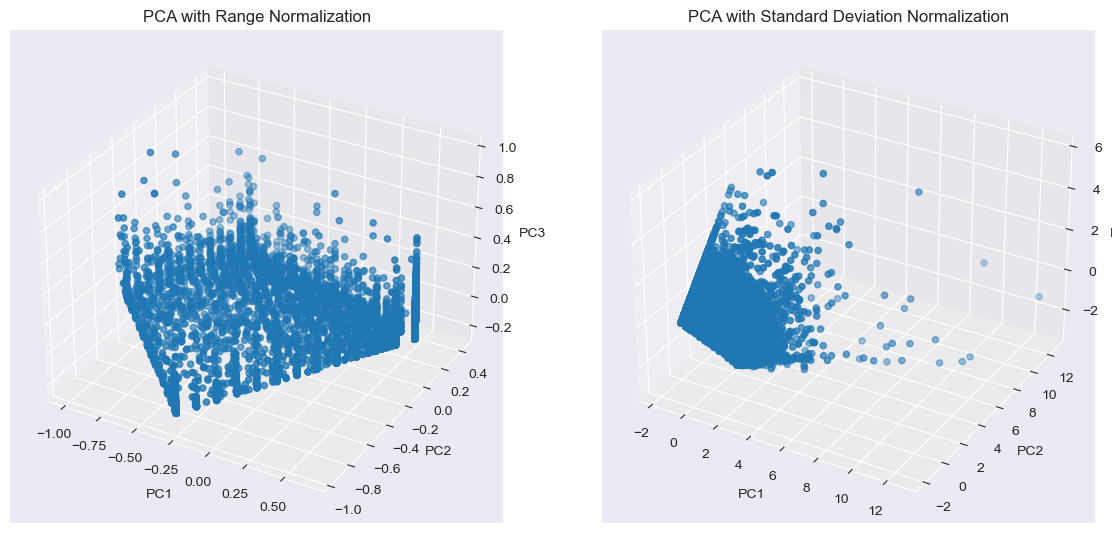

In [11]:
#plot pca with range normalization and std normaliztion side by side
#3d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 7))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(pc_range[:, 0], pc_range[:, 1], pc_range[:, 2])
ax.set_title('PCA with Range Normalization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(pc_std[:, 0], pc_std[:, 1], pc_std[:, 2])
ax.set_title('PCA with Standard Deviation Normalization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')



### b) Choose between SVD and PCA

In [12]:
u, s, vh = np.linalg.svd(X_normed_range, full_matrices=True)

## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1_range = u[:,0] * s[0] 
u2_range = u[:,1] * s[1] 

In [13]:
u, s, vh = np.linalg.svd(X_normed_std, full_matrices=True)

## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1_std = u[:,0] * s[0] 
u2_std = u[:,1] * s[1] 

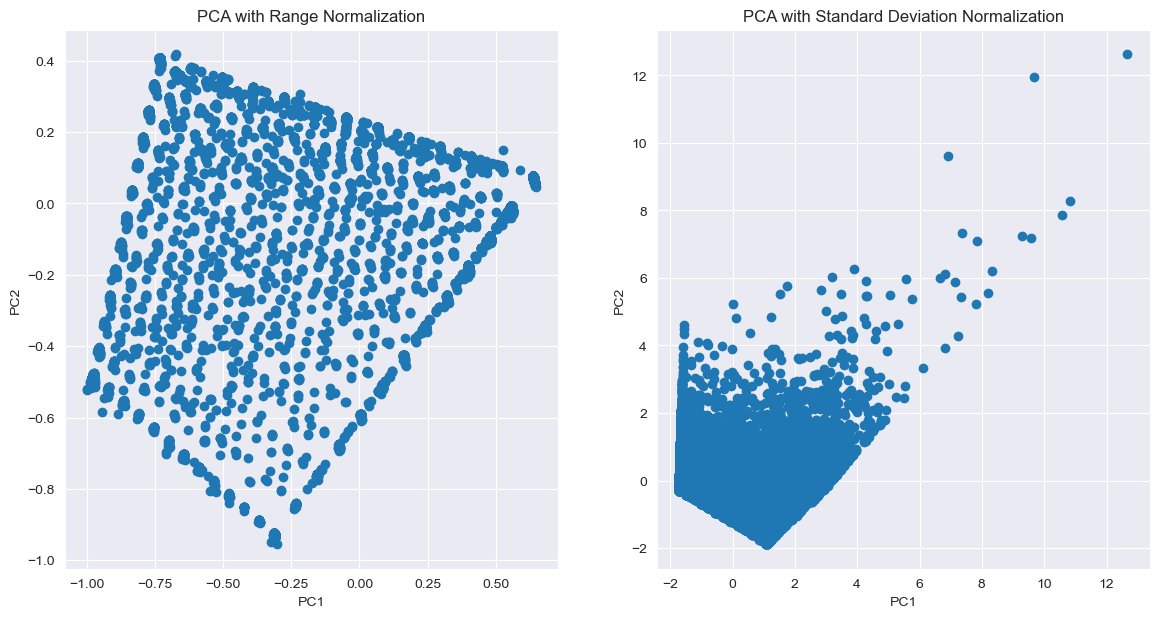

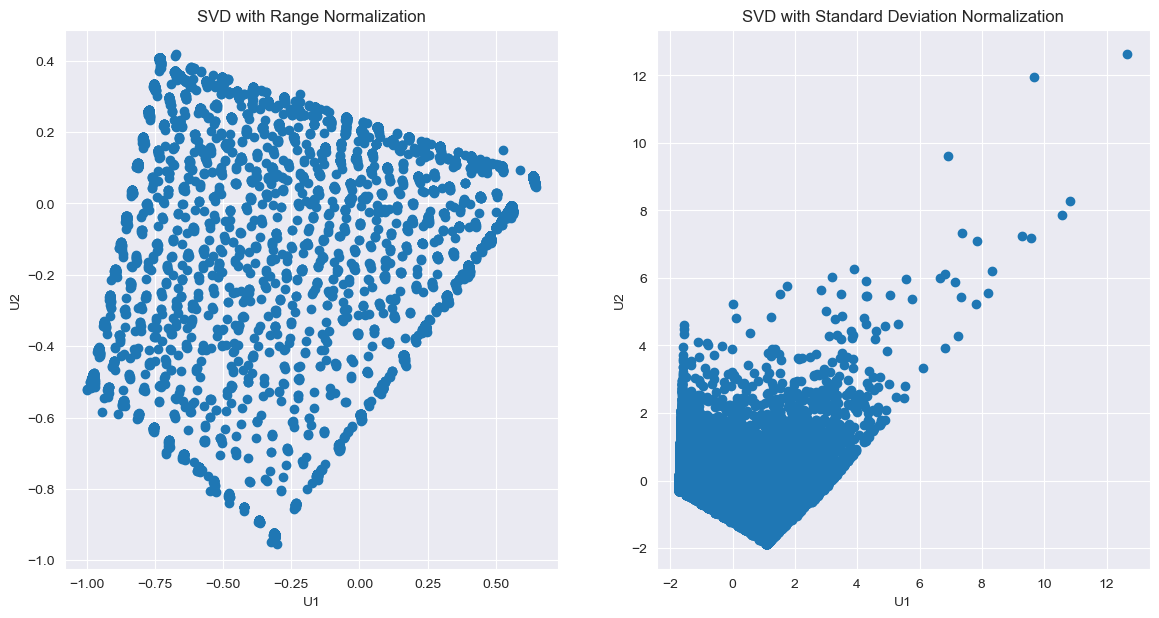

In [14]:
#plot pca with range normalization and std normaliztion side by side
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(pc_range[:, 0], pc_range[:, 1])
plt.title('PCA with Range Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(pc_std[:, 0], pc_std[:, 1])
plt.title('PCA with Standard Deviation Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

#plot SVD with range normalization and std normaliztion side by side
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(u1_range, u2_range)
plt.title('SVD with Range Normalization')
plt.xlabel('U1')
plt.ylabel('U2')

plt.subplot(1, 2, 2)
plt.scatter(u1_std, u2_std)
plt.title('SVD with Standard Deviation Normalization')
plt.xlabel('U1')
plt.ylabel('U2')

plt.show()

### c) use a distinct shape/colour for data points representing a pre‐specified, by yourself, group of objects. Comment on the choice of your groups.

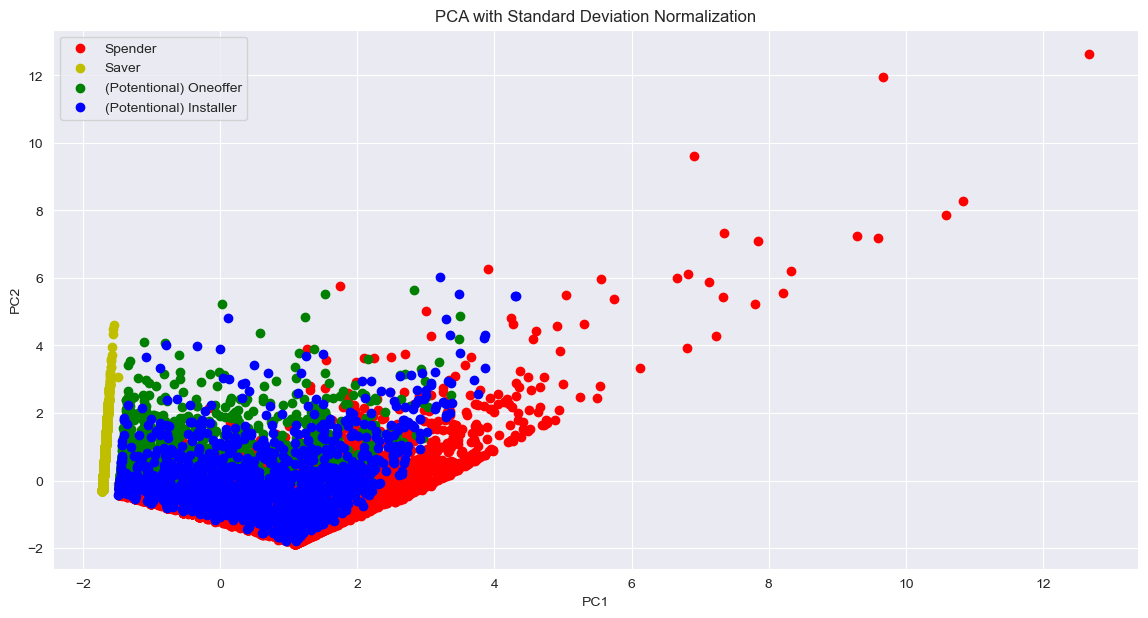

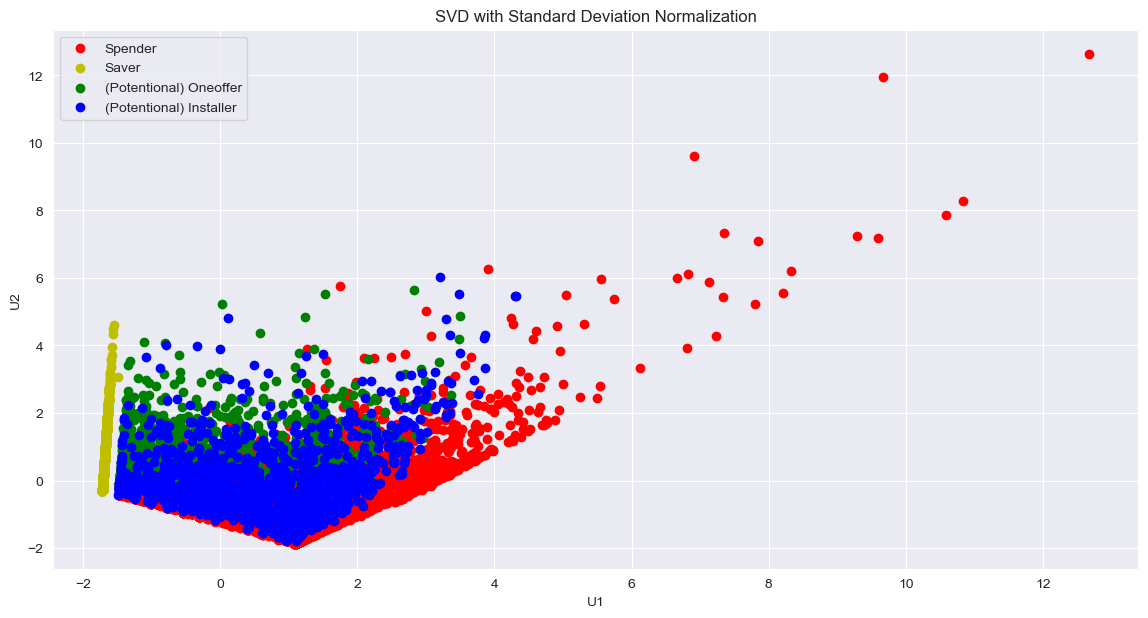

In [15]:
#Color data points on the PCA plot
#red for customers with a balance < purchase
#yellow for customers with a balance > purchase && oneoff_frequency > installments_frequency && purchases_frequency > 0
#green for customers with a balance > purchase && oneoff_frequency < installments_frequency && purchases_frequency > 0
#blue for customers with pruchases_frequency = 0

spenders = data[(data['BALANCE'] < data['PURCHASES'])] #red
saver = data[(data['PURCHASES_FREQUENCY'] == 0) & data['BALANCE'] > data['PURCHASES']] #yellow
possible_oneoffers = data[(data['ONEOFF_PURCHASES_FREQUENCY'] > data['PURCHASES_INSTALLMENTS_FREQUENCY']) & (data['PURCHASES_FREQUENCY'] > 0) & (data['BALANCE'] > data['PURCHASES'])] #green
possible_installers = data[(data['ONEOFF_PURCHASES_FREQUENCY'] < data['PURCHASES_INSTALLMENTS_FREQUENCY']) & (data['PURCHASES_FREQUENCY'] > 0) & (data['BALANCE'] > data['PURCHASES'])] #blue

plt.figure(figsize=(14, 7))

plt.scatter(pc_std[spenders.index, 0], pc_std[spenders.index, 1], c='r')
plt.scatter(pc_std[saver.index, 0], pc_std[saver.index, 1], c='y')
plt.scatter(pc_std[possible_oneoffers.index, 0], pc_std[possible_oneoffers.index, 1], c='g')
plt.scatter(pc_std[possible_installers.index, 0], pc_std[possible_installers.index, 1], c='b')
plt.title('PCA with Standard Deviation Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Spender', 'Saver', '(Potentional) Oneoffer', '(Potentional) Installer'])
plt.show()

plt.figure(figsize=(14, 7))
plt.scatter(u1_std[spenders.index], u2_std[spenders.index], c='r')
plt.scatter(u1_std[saver.index], u2_std[saver.index], c='y')
plt.scatter(u1_std[possible_oneoffers.index], u2_std[possible_oneoffers.index], c='g')
plt.scatter(u1_std[possible_installers.index], u2_std[possible_installers.index], c='b')
plt.title('SVD with Standard Deviation Normalization')
plt.xlabel('U1')
plt.ylabel('U2')

#add legend
plt.legend(['Spender', 'Saver', '(Potentional) Oneoffer', '(Potentional) Installer'])

plt.show()



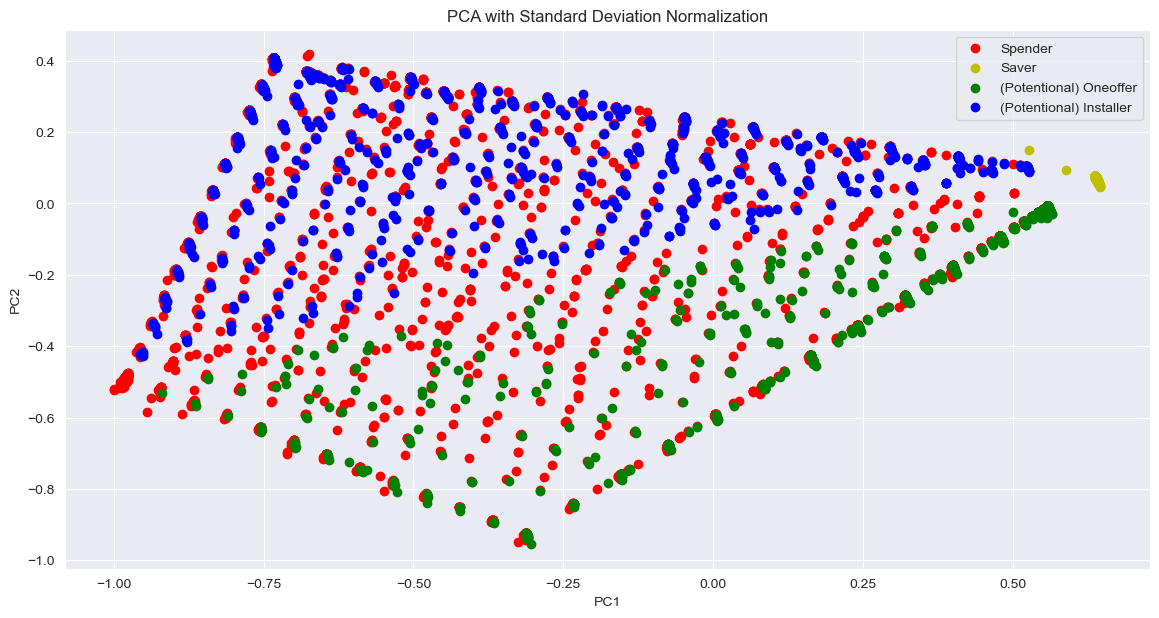

In [16]:
#Color data points on the PCA plot
#red for customers with a balance < purchase
#yellow for customers with a balance > purchase && oneoff_frequency > installments_frequency && purchases_frequency > 0
#green for customers with a balance > purchase && oneoff_frequency < installments_frequency && purchases_frequency > 0
#blue for customers with pruchases_frequency = 0

spenders = data[(data['BALANCE'] < data['PURCHASES'])] #red
saver = data[(data['PURCHASES_FREQUENCY'] == 0) & data['BALANCE'] > data['PURCHASES']] #yellow
possible_oneoffers = data[(data['ONEOFF_PURCHASES_FREQUENCY'] > data['PURCHASES_INSTALLMENTS_FREQUENCY']) & (data['PURCHASES_FREQUENCY'] > 0) & (data['BALANCE'] > data['PURCHASES'])] #green
possible_installers = data[(data['ONEOFF_PURCHASES_FREQUENCY'] < data['PURCHASES_INSTALLMENTS_FREQUENCY']) & (data['PURCHASES_FREQUENCY'] > 0) & (data['BALANCE'] > data['PURCHASES'])] #blue

plt.figure(figsize=(14, 7))

plt.scatter(pc_range[spenders.index, 0], pc_range[spenders.index, 1], c='r')
plt.scatter(pc_range[saver.index, 0], pc_range[saver.index, 1], c='y')
plt.scatter(pc_range[possible_oneoffers.index, 0], pc_range[possible_oneoffers.index, 1], c='g')
plt.scatter(pc_range[possible_installers.index, 0], pc_range[possible_installers.index, 1], c='b')
plt.title('PCA with Standard Deviation Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Spender', 'Saver', '(Potentional) Oneoffer', '(Potentional) Installer'])
plt.show()



In [17]:
#count each group
print('Spenders:', spenders.shape[0])
print('Saver (no purchases):', saver.shape[0])
print('Oneoffers:', possible_oneoffers.shape[0])
print('Installers:', possible_installers.shape[0])


Spenders: 4016
Saver (no purchases): 2035
Oneoffers: 1265
Installers: 1537


### d) Calculate and make a graphical presentation of the “quality” of the PC projection of your data. Discuss your results.

In [18]:
#Principal component projection - explained variance with plotly

#explained variance
explained_variance_range = eigenvalues_range / eigenvalues_range.sum()
explained_variance_std = eigenvalues_std / eigenvalues_std.sum()

#plot explained variance
trace1 = Bar(
    x=['PC %s' %i for i in range(1, 7)],
    y=explained_variance_range,
    name='Range Normalization',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace2 = Bar(
    x=['PC %s' %i for i in range(1, 7)],
    y=explained_variance_std,
    name='Standard Deviation Normalization',
    marker=dict(
        color='rgb(204,204,204)',
    )
)
data = [trace1, trace2]
layout = Layout(
    yaxis=dict(
        title='Explained variance'
    ),
    barmode='group',
    title='Explained variance by different normalizations'
)
fig = Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'

In [19]:
#calculate the quality of the PC projection on the data
#calculate explained variance
explained_variance_std = np.var(pc_std, axis=0)
explained_variance_ratio_std = explained_variance_std / np.sum(explained_variance_std)
explained_variance_ratio_std

print ("first component explains", explained_variance_ratio_std[0]*100, "% of the variance")
print ("second component explains", explained_variance_ratio_std[1]*100, "% of the variance")
print ("third component explains", explained_variance_ratio_std[2]*100, "% of the variance")
print ("third component explains", explained_variance_ratio_std[3]*100, "% of the variance")
print ("third component explains", explained_variance_ratio_std[4]*100, "% of the variance")


first component explains 47.79473520593337 % of the variance
second component explains 24.118743408012595 % of the variance
third component explains 16.78407570727278 % of the variance
third component explains 10.232716510077102 % of the variance
third component explains 1.069729168704159 % of the variance


In [20]:
#calculate the quality of the PC projection on the data
#calculate explained variance
explained_variance_range = np.var(pc_range, axis=0)
explained_variance_ratio_range = explained_variance_range / np.sum(explained_variance_range)
explained_variance_ratio_range

print("first component explains", explained_variance_ratio_range[0]*100, "% of the variance")
print("second component explains", explained_variance_ratio_range[1]*100, "% of the variance")
print("third component explains", explained_variance_ratio_range[2]*100, "% of the variance")
print("third component explains", explained_variance_ratio_range[3]*100, "% of the variance")
print("third component explains", explained_variance_ratio_range[4]*100, "% of the variance")


first component explains 73.75505595219455 % of the variance
second component explains 21.037069619857846 % of the variance
third component explains 3.0033637672135627 % of the variance
third component explains 1.920335686508468 % of the variance
third component explains 0.28417497422558496 % of the variance


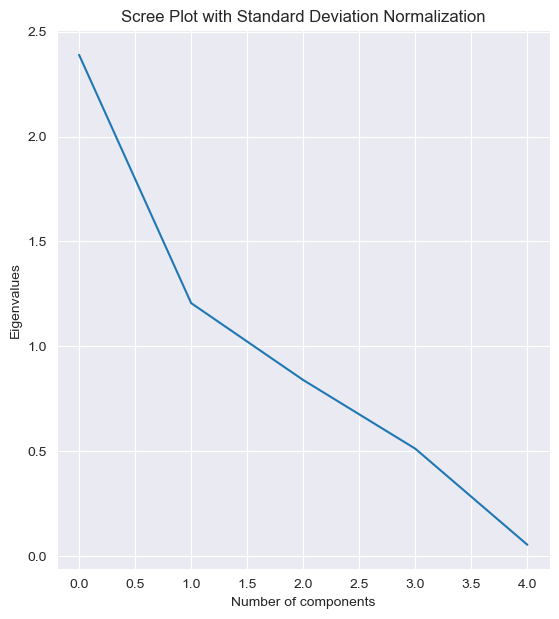

In [22]:
#Scree Plot: Analyzing the eigenvalues of the principal components to identify the optimal number of components to retain
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)
plt.plot(eigenvalues_std)
plt.title('Scree Plot with Standard Deviation Normalization')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

plt.show()
